In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Read the dataset into a pandas DataFrame
data = pd.read_excel('gtd_total_data_clean.xlsx')

# Select the required columns
columns = ['gname', 'weaptype1_txt']

# Filter the dataset to exclude missing values or unknown categories
filtered_data = data.dropna(subset=columns)

# Create a contingency table
contingency_table = pd.crosstab(filtered_data['gname'], filtered_data['weaptype1_txt'])

# Analyze the contingency table for patterns and correlations
# You can inspect the table, calculate statistics, or perform further analysis as needed
print(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test statistic:", chi2)
print("p-value:", p)

# Calculate Cramér's V
n = contingency_table.sum().sum()
phi = chi2 / n
r, k = contingency_table.shape
v = np.sqrt(phi / min(r - 1, k - 1))
print("Cramér's V:", v)



weaptype1_txt                                       Biological  Chemical   
gname                                                                      
1 May                                                        0         0  \
14 K Triad                                                   0         0   
14 March Coalition                                           0         0   
14th of December Command                                     0         0   
15th of September Liberation Legion                          0         0   
...                                                        ...       ...   
Zuwar al-Imam Rida                                           0         0   
Zviadists                                                    0         0   
Zwai Tribe                                                   0         0   
leftist guerrillas-Bolivarian militia                        0         0   
uMkhonto we Sizwe Military Veterans Association...           0         0   

weaptype1_t

                                   Terrorist Group  Number of Incidents
0                                          Unknown                60194
1                                          Taliban                12216
2      Islamic State of Iraq and the Levant (ISIL)                 7479
3                                       Al-Shabaab                 4512
4                  Houthi extremists (Ansar Allah)                 3513
5                                       Boko Haram                 3459
6                          New People's Army (NPA)                 2339
7   Communist Party of India - Maoist (CPI-Maoist)                 2048
8                                          Maoists                 1905
9                  Tehrik-i-Taliban Pakistan (TTP)                 1482
10                  Kurdistan Workers' Party (PKK)                 1458
11                               Fulani extremists                 1279
12        Al-Qaida in the Arabian Peninsula (AQAP)              

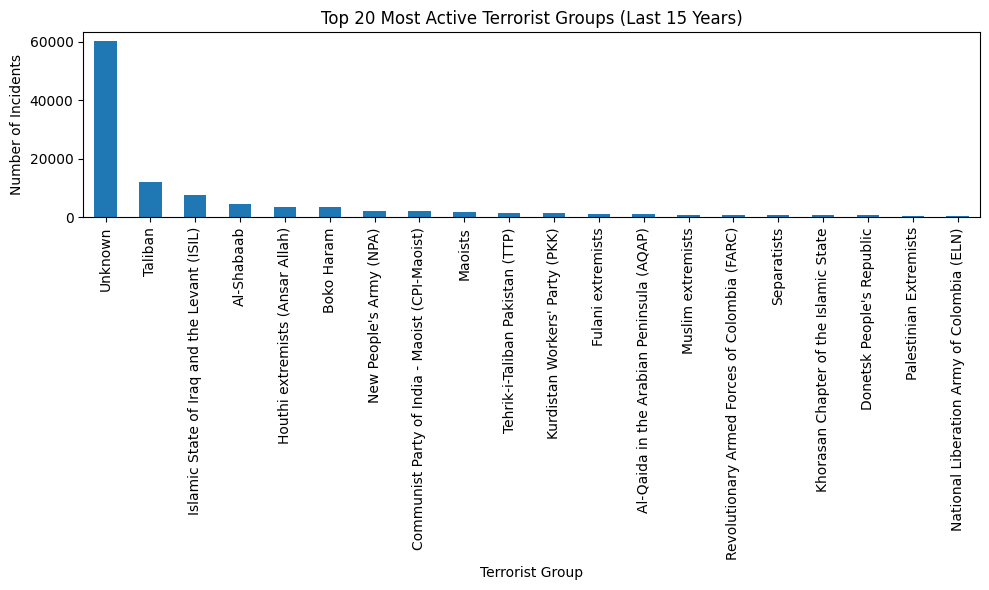

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Filter data for the last 15 years
current_date = datetime.now()
start_date = current_date - timedelta(days=15*365)  # Assuming 365 days per year
filtered_data = data[data['date'] >= start_date]

# Group the filtered data by terrorist group and count the number of incidents
group_counts = filtered_data['gname'].value_counts()

# Select the top N most active groups
N = 20  # Change N to the desired number of groups
top_groups = group_counts.head(N)

# Create a table
table_data = {'Terrorist Group': top_groups.index, 'Number of Incidents': top_groups.values}
table = pd.DataFrame(table_data)

# Print the table
print(table)

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = top_groups.plot(kind='bar')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Incidents')
plt.title(f'Top {N} Most Active Terrorist Groups (Last 15 Years)')

# Rotate the x-axis labels vertically
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90, ha='center')

# Show the plot
plt.tight_layout()
plt.show()




In [4]:
import pandas as pd
from datetime import datetime, timedelta

# Filter data for the last 15 years
current_date = datetime.now()
start_date = current_date - timedelta(days=15*365)  # Assuming 365 days per year
filtered_data = data[data['date'] >= start_date]

# Count the occurrences of each weapon
weapon_counts = filtered_data['weaptype1_txt'].value_counts()

# Get the most used weapons
most_used_weapons = weapon_counts.head(10)  # Change 10 to the desired number of weapons

# Print the most used weapons
for weapon, count in most_used_weapons.items():
    print(f"{weapon}: {count}")



Explosives: 66647
Firearms: 37727
Unknown: 13426
Incendiary: 6654
Melee: 2498
Chemical: 181
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs): 154
Sabotage Equipment: 126
Other: 84
Fake Weapons: 9


In [5]:
import pandas as pd
from datetime import datetime, timedelta

# Filter data for the last 15 years
current_date = datetime.now()
start_date = current_date - timedelta(days=15*365)  # Assuming 365 days per year
filtered_data = data[data['date'] >= start_date]

# Group the filtered data by terrorist group and count the occurrences of each weapon
group_weapons = filtered_data.groupby('gname')['weaptype1_txt'].value_counts()

# Select the top N most active groups
N = 20  # Change N to the desired number of groups
top_groups = group_counts.head(N).index

# Create a dictionary to store the most used weapon for each group
most_used_weapons = {}

# Iterate over the top groups and determine the most used weapon
for group in top_groups:
    group_data = group_weapons[group]
    most_used_weapon = group_data.idxmax()
    most_used_weapons[group] = most_used_weapon

# Print the most used weapons by each group
for group, weapon in most_used_weapons.items():
    print(f"{group}: {weapon}")



Unknown: Explosives
Taliban: Explosives
Islamic State of Iraq and the Levant (ISIL): Explosives
Al-Shabaab: Explosives
Houthi extremists (Ansar Allah): Explosives
Boko Haram: Firearms
New People's Army (NPA): Firearms
Communist Party of India - Maoist (CPI-Maoist): Firearms
Maoists: Explosives
Tehrik-i-Taliban Pakistan (TTP): Explosives
Kurdistan Workers' Party (PKK): Explosives
Fulani extremists: Firearms
Al-Qaida in the Arabian Peninsula (AQAP): Explosives
Muslim extremists: Firearms
Revolutionary Armed Forces of Colombia (FARC): Explosives
Separatists: Firearms
Khorasan Chapter of the Islamic State: Explosives
Donetsk People's Republic: Explosives
Palestinian Extremists: Melee
National Liberation Army of Colombia (ELN): Explosives


In [6]:
import pandas as pd
from datetime import datetime, timedelta

# Filter data for the last 15 years
current_date = datetime.now()
start_date = current_date - timedelta(days=15 * 365)  # Assuming 365 days per year
filtered_data = data[data['date'] >= start_date]

# Count the occurrences of each weapon
weapon_counts = filtered_data['weaptype1_txt'].value_counts()

# Get the top 3 most used weapons and their incident counts
top_3_weapons = weapon_counts.head(5)

# Create a table to store the results
result_table = pd.DataFrame({'Weapon': top_3_weapons.index, 'Number of Incidents': top_3_weapons.values})

# Print the table
print(result_table)


       Weapon  Number of Incidents
0  Explosives                66647
1    Firearms                37727
2     Unknown                13426
3  Incendiary                 6654
4       Melee                 2498


Text(0.5, -0.2, 'Explosives: Exp\nFirearms: Fire\nUnknown: Unk\nIncendiary: Inc\nMelee: Mle\nChemical: Chem\nSabotage Equipment: Sab\nOther: Other\nVehicle (not to include vehicle-borne explosives, i.e., car or truck bombs): Veh')

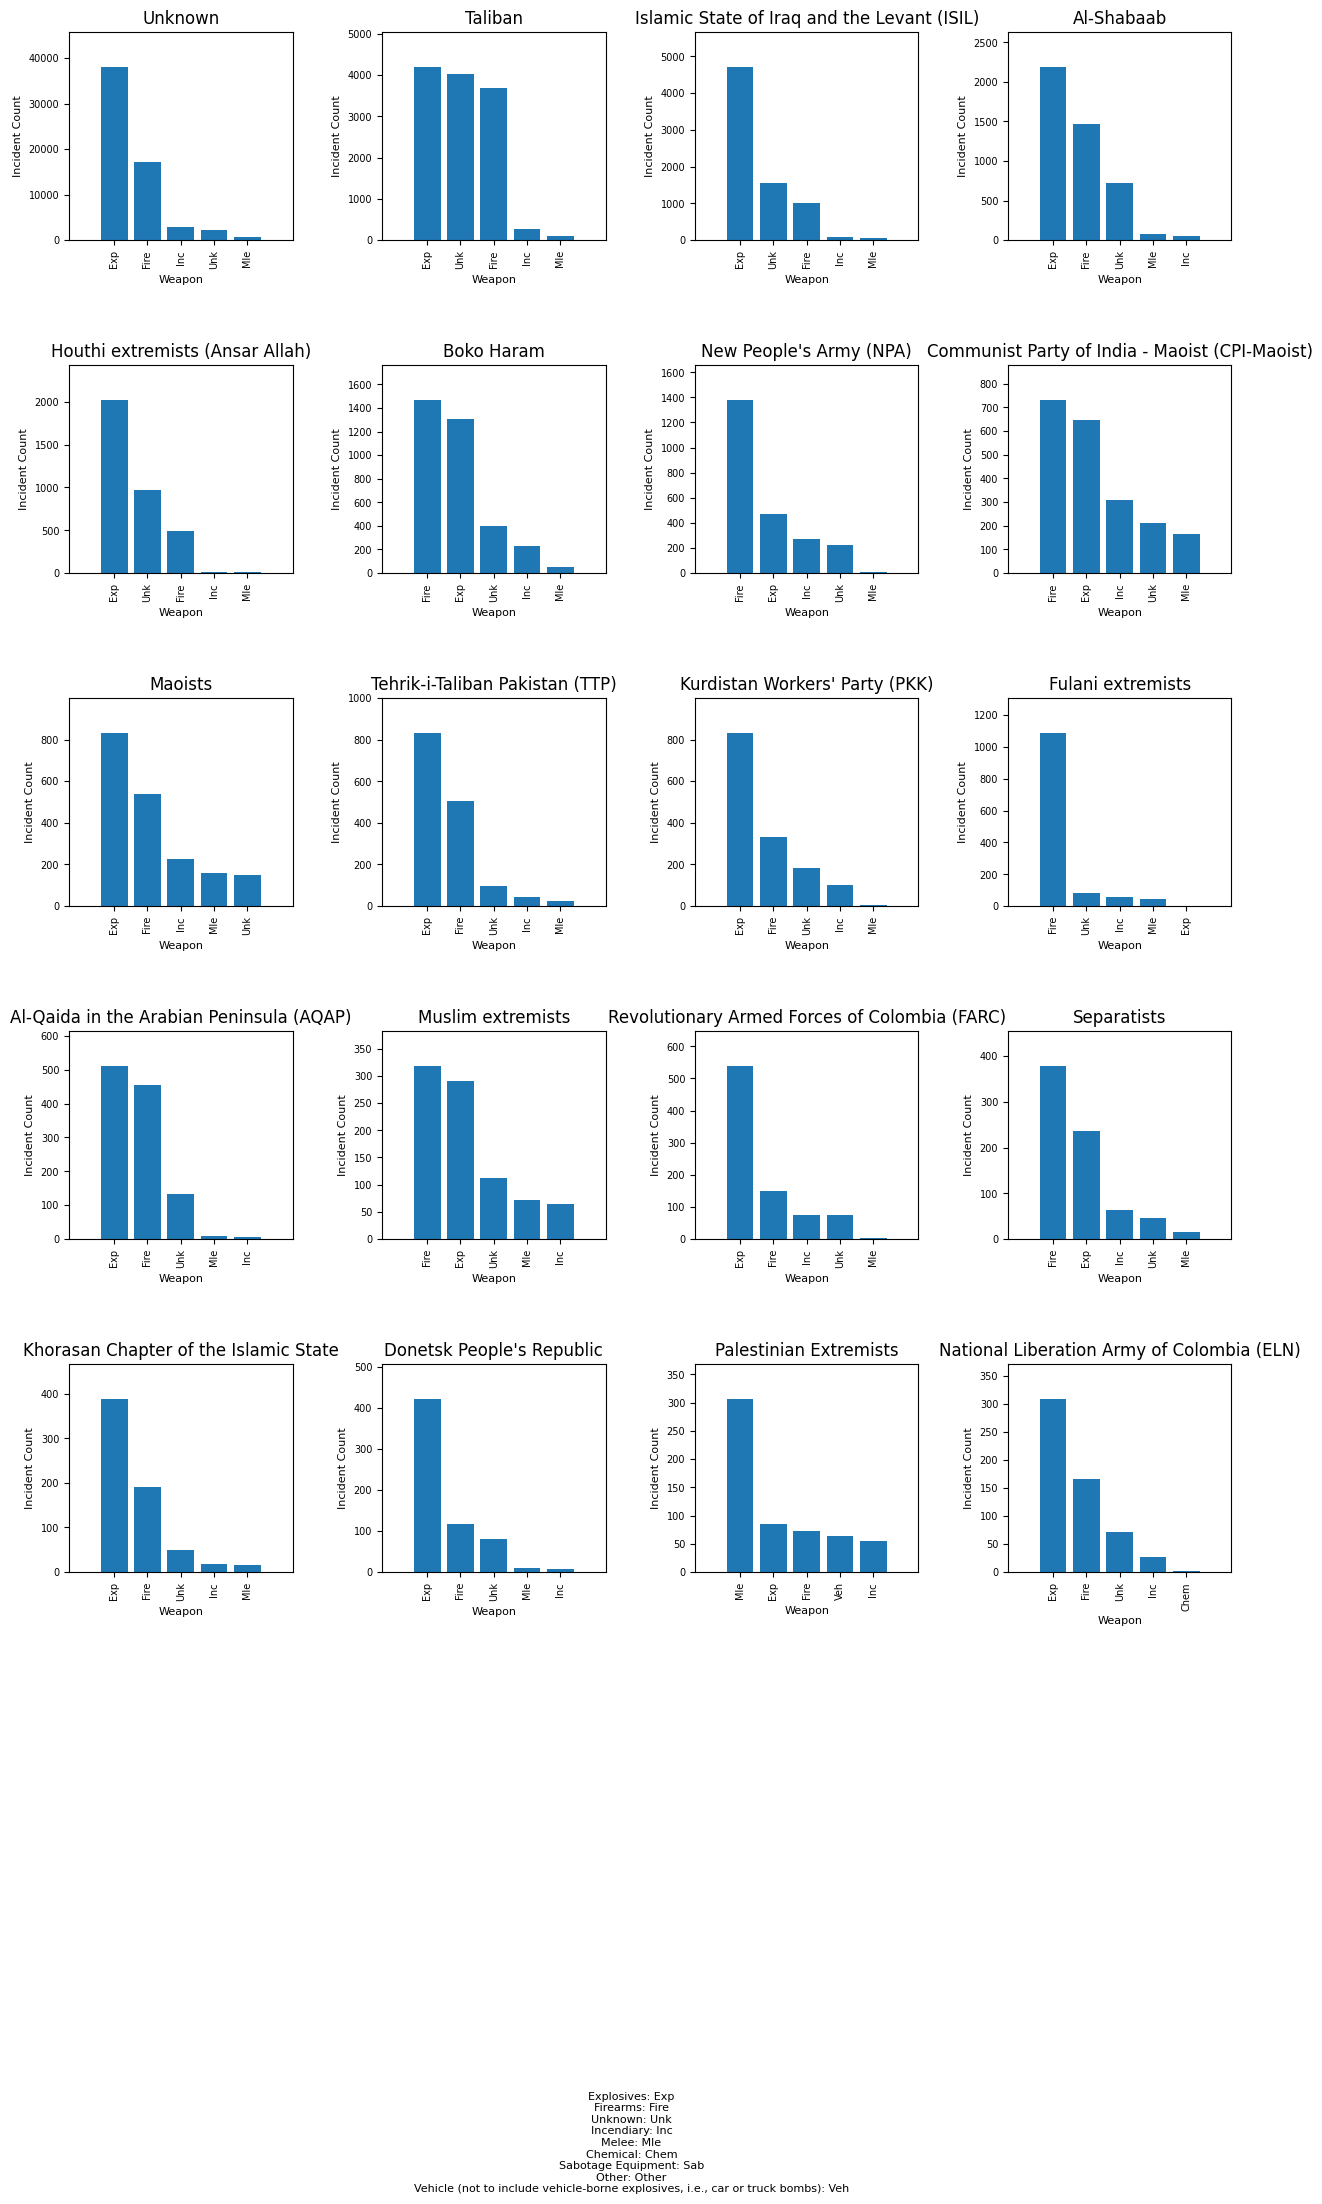

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataframe to include only the desired columns
filtered_data = data[['gname', 'weaptype1_txt', 'iyear']]

# Filter the data for the last 15 years
current_year = pd.Timestamp.now().year
filtered_data = filtered_data[filtered_data['iyear'] >= (current_year - 15)]

# Group the data by 'gname' and 'weaptype1_txt' and count the incidents
grouped_data = filtered_data.groupby(['gname', 'weaptype1_txt']).size().reset_index(name='incident_count')

# Sort the data by 'gname' and 'incident_count' in descending order
sorted_data = grouped_data.sort_values(['gname', 'incident_count'], ascending=[True, False])

# Get the top 20 most active groups based on the total number of attacks
top_groups = sorted_data.groupby('gname')['incident_count'].sum().nlargest(20).index

# Create a dictionary to store the top 5 weapons for each group
top_weapons = {}

# Iterate over the top groups and extract the top 5 weapons
for group in top_groups:
    group_data = sorted_data.loc[sorted_data['gname'] == group].head(5)
    weapons = group_data['weaptype1_txt']
    incident_counts = group_data['incident_count']
    total_attacks = grouped_data.loc[grouped_data['gname'] == group]['incident_count'].sum()
    top_weapons[group] = pd.DataFrame({'Weapon': weapons, 'Incident Count': incident_counts})

# Calculate the number of rows and columns for subplots
num_groups = len(top_weapons)
num_cols = 4
num_rows = (num_groups + num_cols - 1) // num_cols

# Create subplots for each group
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 4))

# Flatten the axes array
axes = axes.flatten()

# Define abbreviation dictionary
abbreviations = {
    'Explosives': 'Exp',
    'Firearms': 'Fire',
    'Unknown': 'Unk',
    'Incendiary': 'Inc',
    'Melee': 'Mle',
    'Chemical': 'Chem',
    'Sabotage Equipment': 'Sab',
    'Other': 'Other',
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)' : 'Veh'
}


# Sort the top_weapons dictionary based on the total incident count of the groups
top_weapons = {group: top_weapons[group] for group in top_groups}

# Iterate over the top groups and plot the bar chart
for i, (group, weapons) in enumerate(top_weapons.items()):
    ax = axes[i]
    
    # Shorten label names using abbreviations
    shortened_weapons = [abbreviations.get(weapon, weapon) for weapon in weapons['Weapon']]
    
    ax.bar(shortened_weapons, weapons['Incident Count'])
    ax.set_title(f"{group}")
    ax.set_xlabel("Weapon", fontsize=8)
    ax.set_ylabel("Incident Count", fontsize=8)
    ax.tick_params(axis='x', rotation=90, labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
    ax.margins(0.2)
    
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Remove empty subplots if the number of groups is not a multiple of num_cols
if num_groups % num_cols != 0:
    for i in range(num_groups, num_rows * num_cols):
        fig.delaxes(axes[i])

# Add abbreviation legend
legend_text = [f'{weapon}: {abbreviation}' for weapon, abbreviation in abbreviations.items()]
legend_text = '\n'.join(legend_text)
fig.text(0.5, -0.2, legend_text, ha='center', fontsize=8)